In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys

In [2]:
data = pd.read_csv("TSLA.CSV")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
## Univariate time series
stock_data = data[['Date','Close']]

In [5]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data['Date'] =  pd.to_datetime(stock_data['Date'])

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data = stock_data.set_index('Date')

In [10]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


# EDA

In [11]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


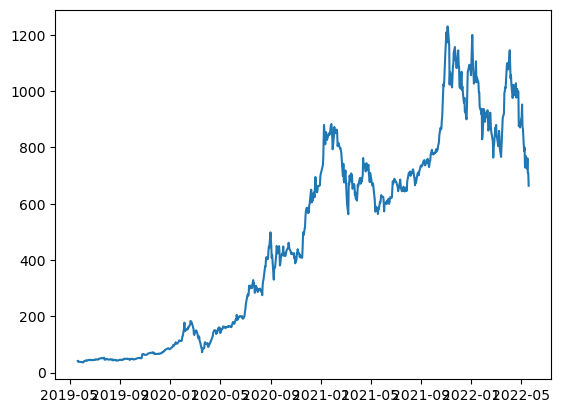

In [12]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

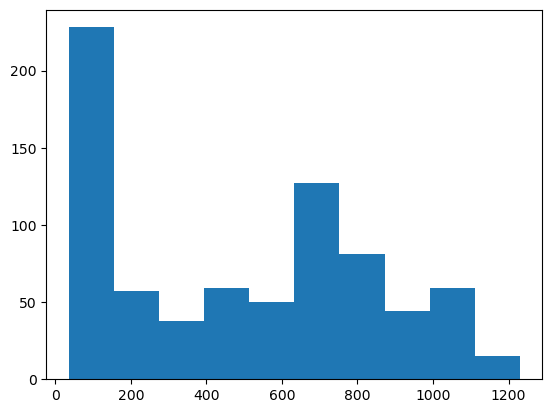

In [13]:
plt.hist(stock_data.Close)

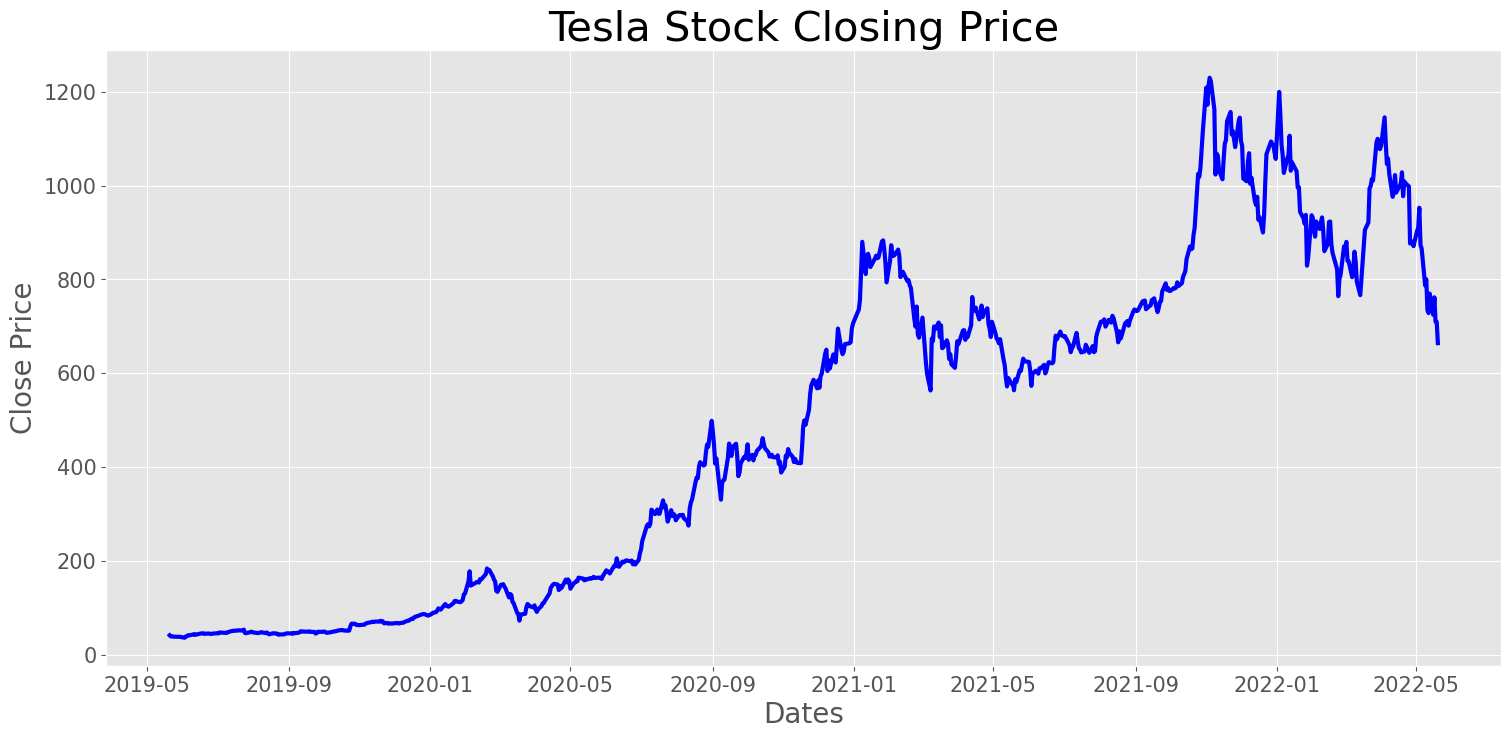

In [14]:
# ploting Close Price
plt.style.use('ggplot')
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize = 20)
plt.xticks(fontsize =15)
plt.ylabel('Close Price', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'],linewidth = 3,color = 'blue')
plt.title('Tesla Stock Closing Price',fontsize = 30)
plt.show()

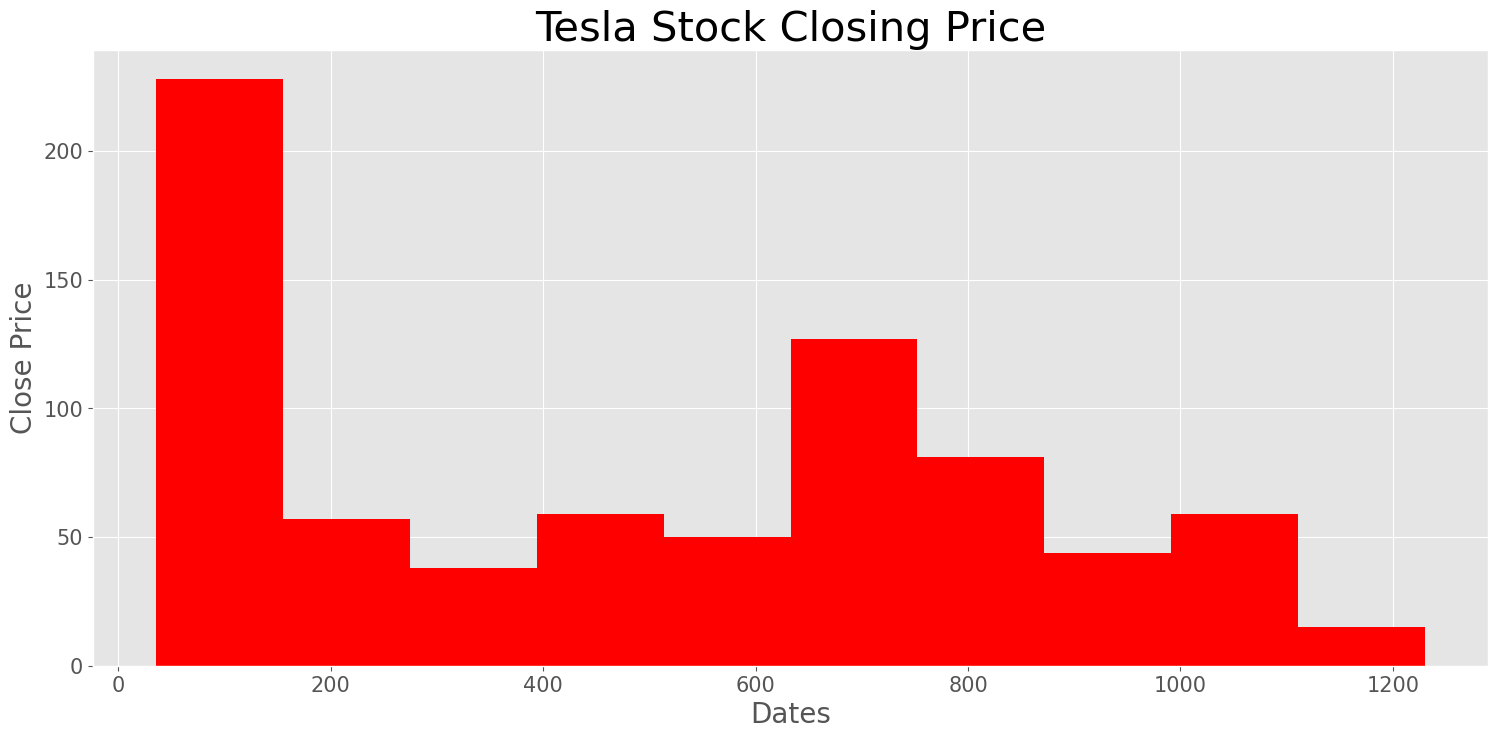

In [15]:
# ploting Close price Histogram Plot
plt.style.use('ggplot')
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize =20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Price',fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data.Close,linewidth = 3 ,color = 'red')
plt.title('Tesla Stock Closing Price',fontsize = 30)
plt.show()

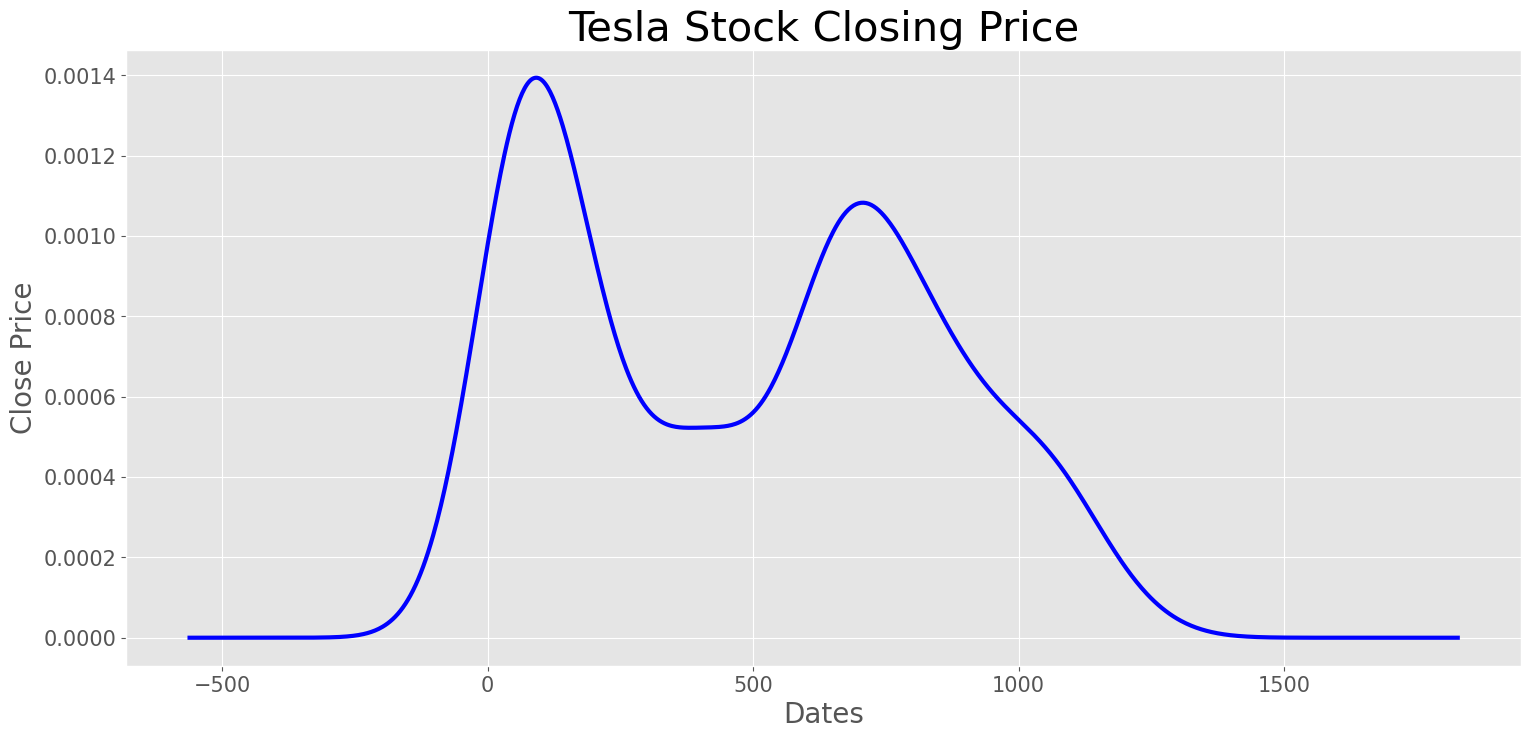

In [16]:
# ploting Close price Distribution Plot
df_close = stock_data['Close']
df_close.plot(kind ='kde',figsize = (18,8),linewidth = 3,color = "blue")
plt.grid('both')
plt.xlabel('Dates',fontsize =20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Price',fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('Tesla Stock Closing Price',fontsize = 30)
plt.show()

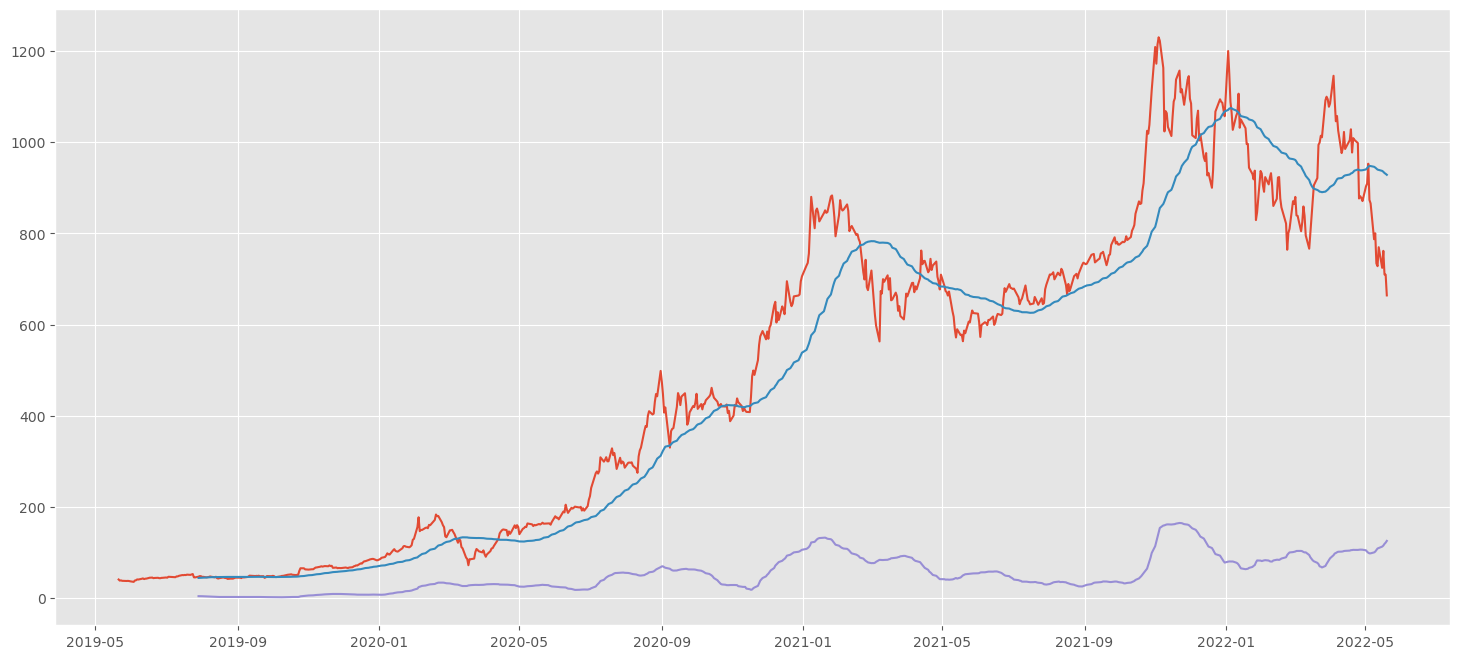

In [17]:
rolmean = stock_data['Close'].rolling(48).mean()
rolstd = stock_data['Close'].rolling(48).std()
plt.figure(figsize = (18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [18]:
# ADF(Augmented Deckey Fuller Test)
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])
pd.Series(adft[0:4],index = ['test stats', 'p-value','lag','data points'])


test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

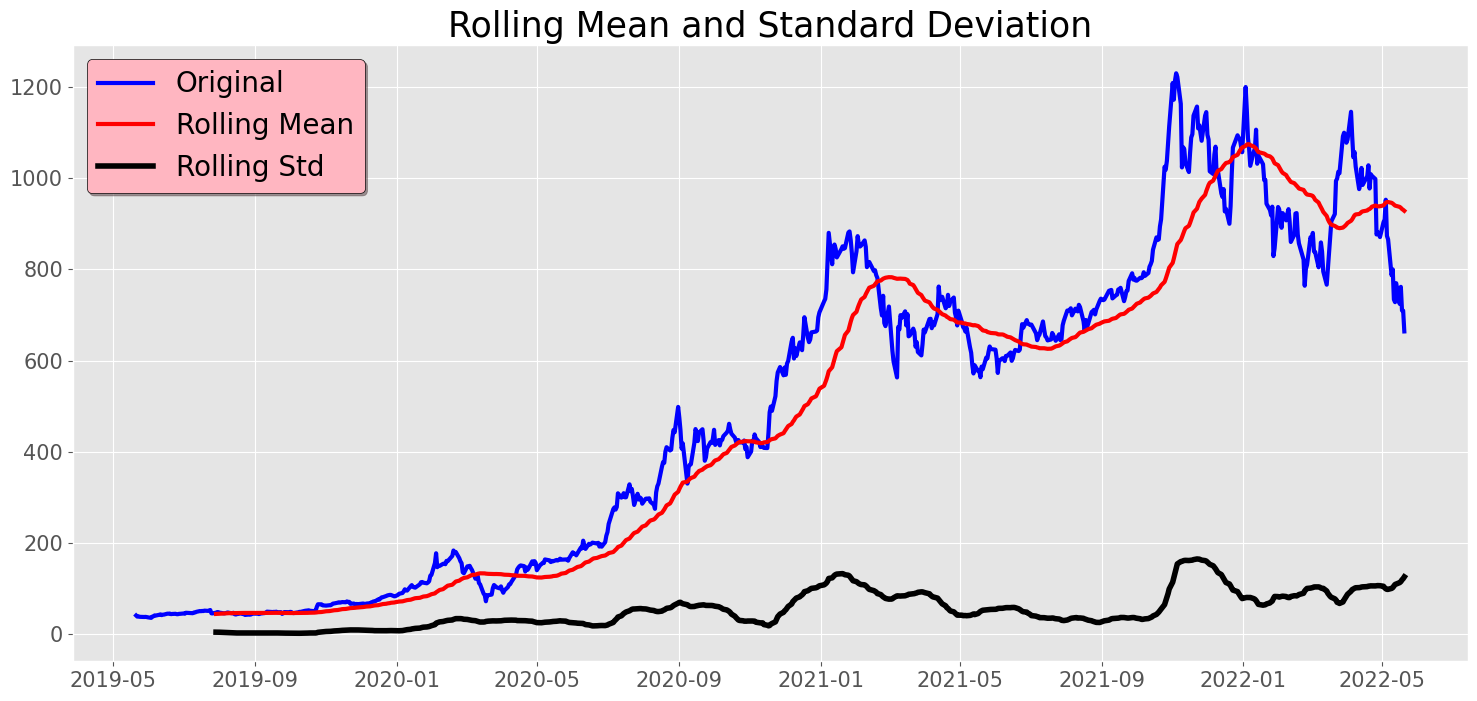

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [20]:
test_stationarity(stock_data.Close)

<Figure size 2000x1000 with 0 Axes>

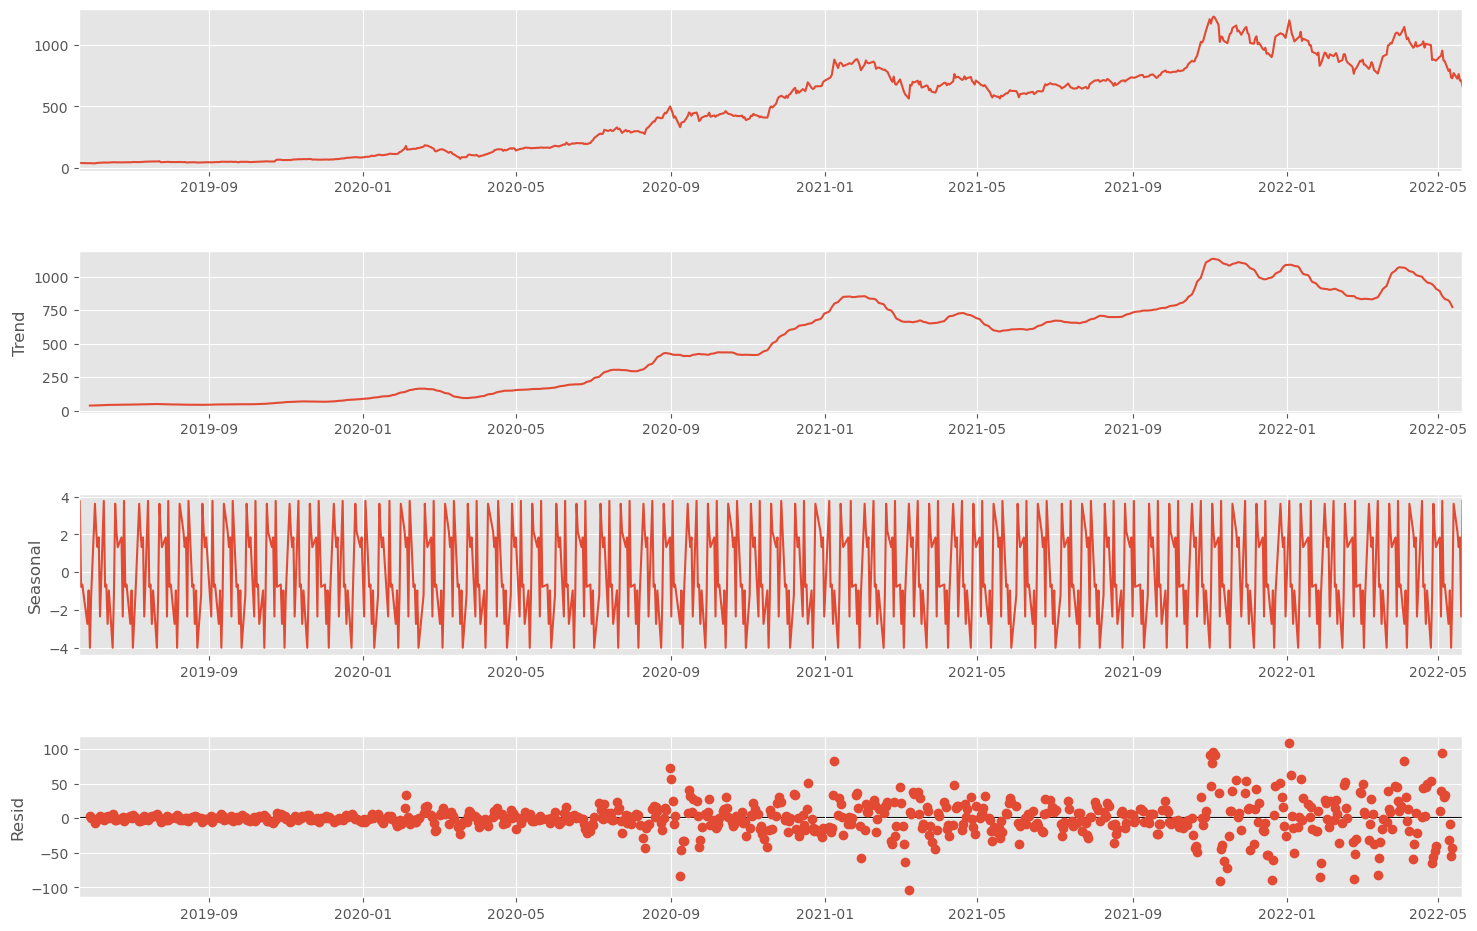

In [21]:
# Time Series Decomposition
#Additive Sesasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']],period = 12)
result.seasonal
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

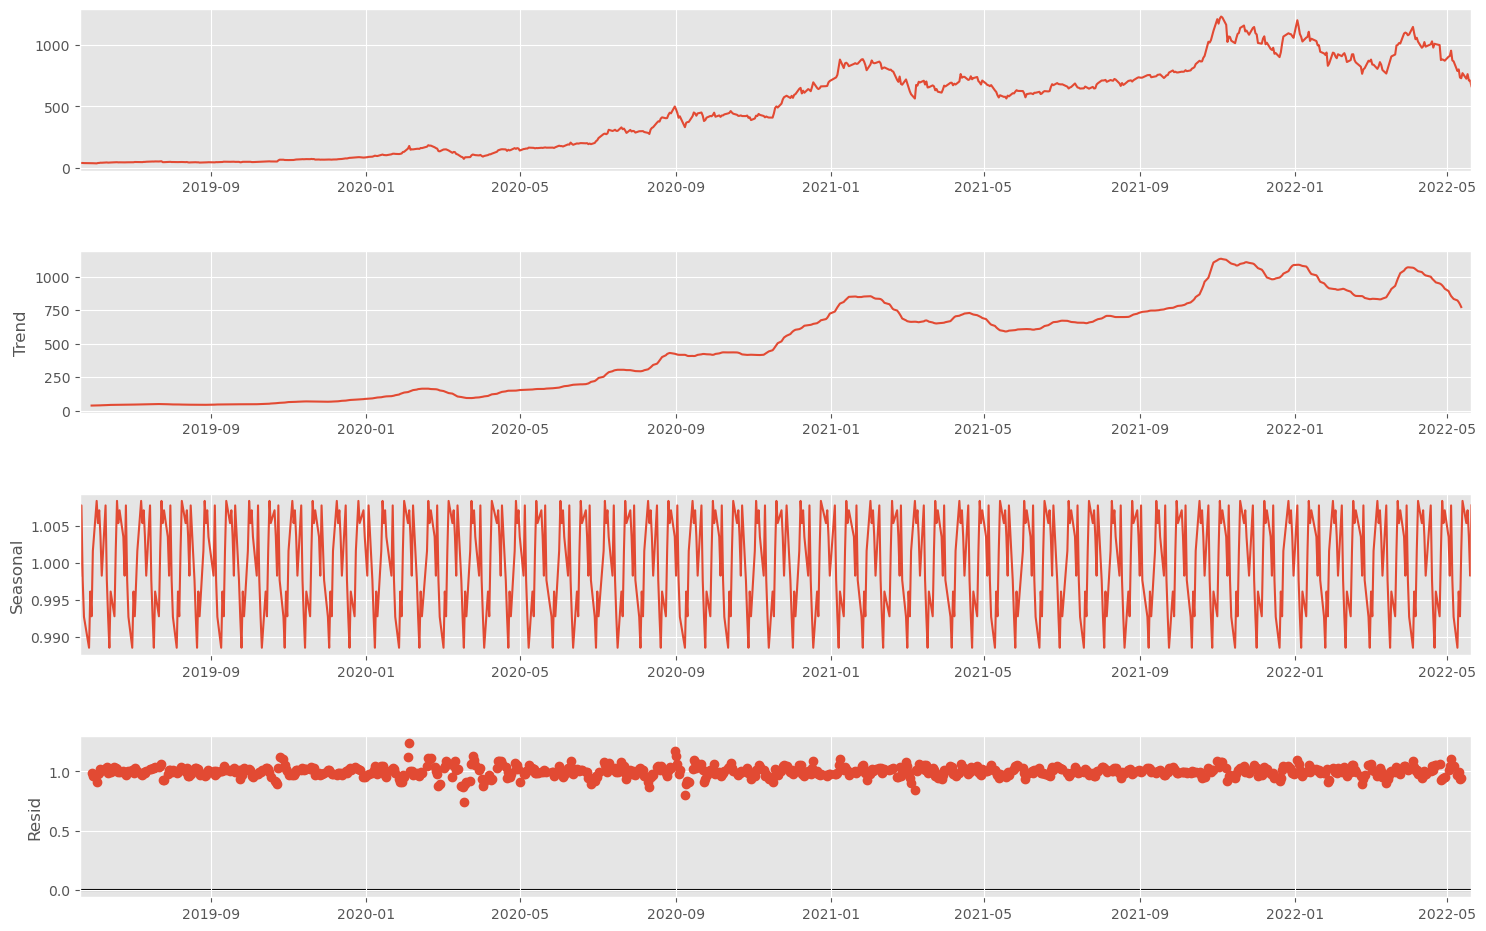

In [22]:
# Multiplicative Sesasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period = 12,model = "multiplicative")
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<AxesSubplot:xlabel='Close'>

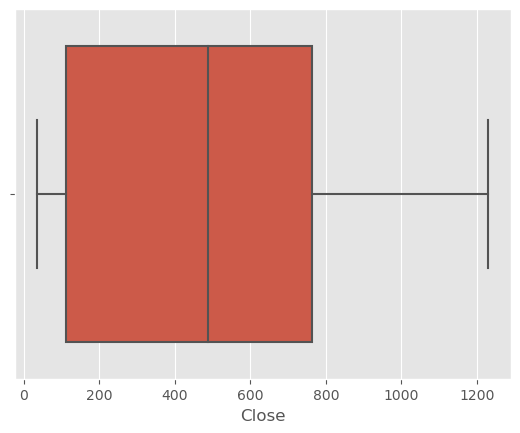

In [23]:
sns.boxplot(stock_data.Close)

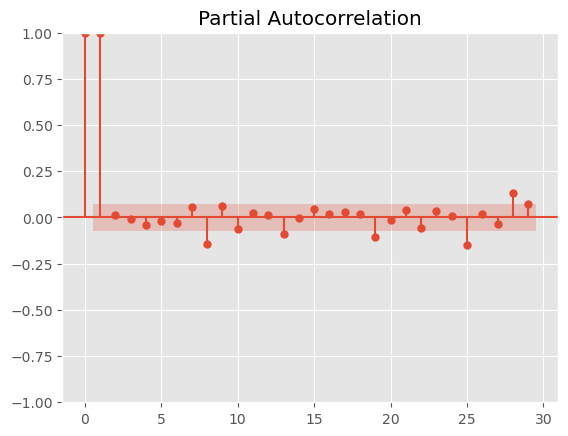

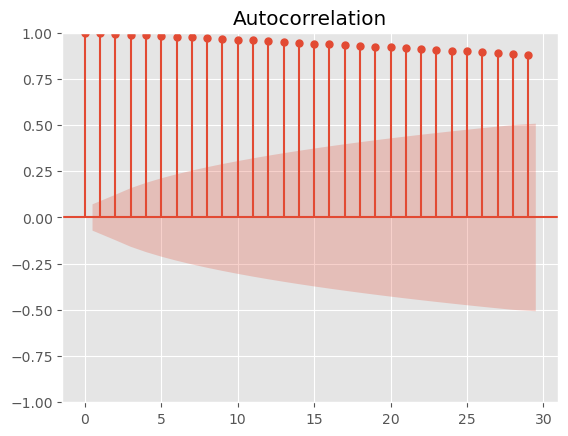

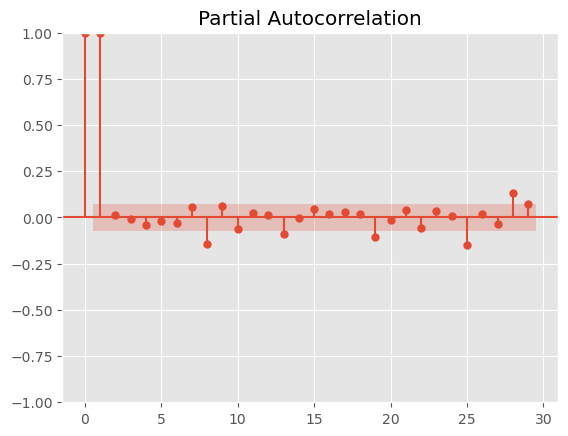

In [24]:
## Calculate correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Prepocessing of Data

In [25]:
df_close = stock_data['Close']

In [26]:
df_close.head()

Date
2019-05-21    41.015999
2019-05-22    38.546001
2019-05-23    39.098000
2019-05-24    38.125999
2019-05-28    37.740002
Name: Close, dtype: float64

In [27]:
#stationarity
df_close.diff()

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

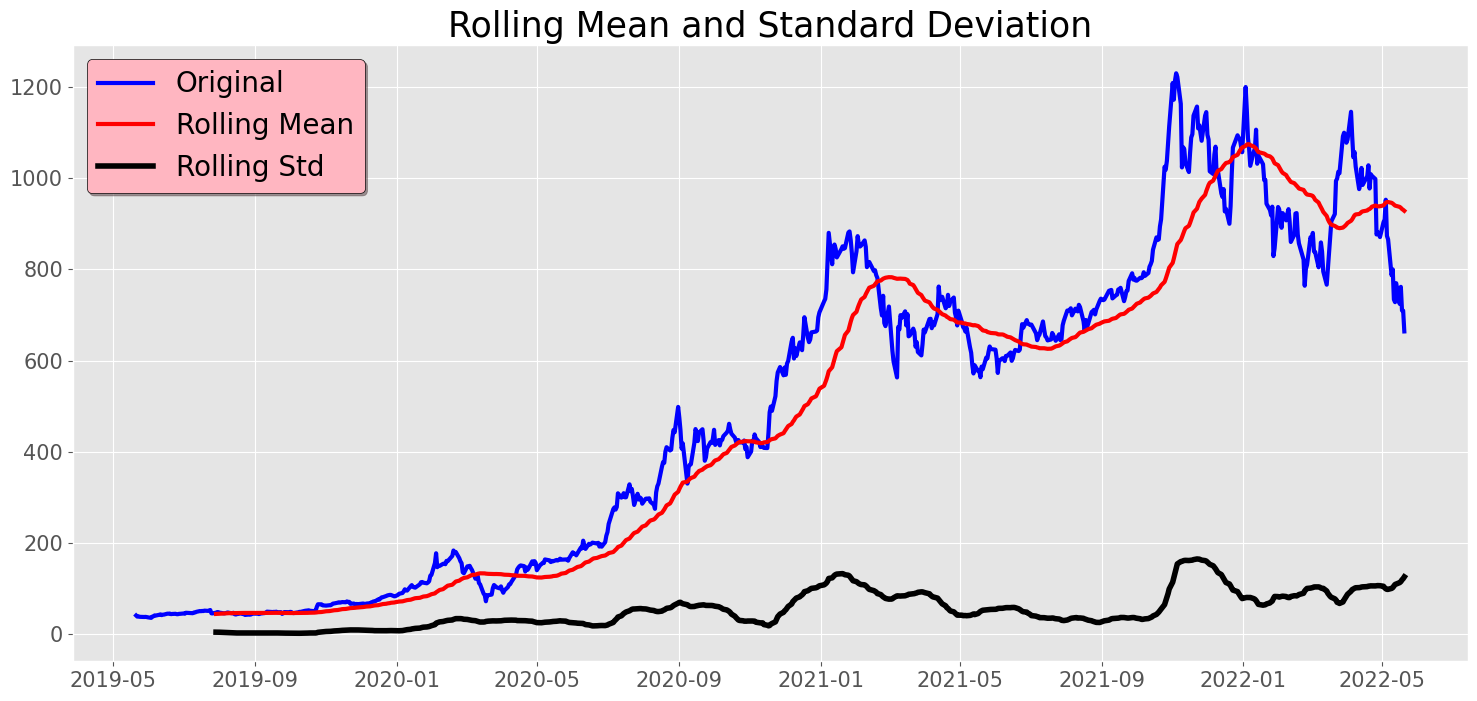

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [28]:
df_close = df_close.dropna()
test_stationarity(df_close)

In [29]:
df_close[0:-60]


Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-02-17    876.349976
2022-02-18    856.979980
2022-02-22    821.530029
2022-02-23    764.039978
2022-02-24    800.770020
Name: Close, Length: 698, dtype: float64

In [30]:
df_close[-60:]

Date
2022-02-25     809.869995
2022-02-28     870.429993
2022-03-01     864.369995
2022-03-02     879.890015
2022-03-03     839.289978
2022-03-04     838.289978
2022-03-07     804.580017
2022-03-08     824.400024
2022-03-09     858.969971
2022-03-10     838.299988
2022-03-11     795.349976
2022-03-14     766.369995
2022-03-15     801.890015
2022-03-16     840.229980
2022-03-17     871.599976
2022-03-18     905.390015
2022-03-21     921.159973
2022-03-22     993.979980
2022-03-23     999.109985
2022-03-24    1013.919983
2022-03-25    1010.640015
2022-03-28    1091.839966
2022-03-29    1099.569946
2022-03-30    1093.989990
2022-03-31    1077.599976
2022-04-01    1084.589966
2022-04-04    1145.449951
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
2022-04-12     986.950012
2022-04-13    1022.369995
2022-04-14     985.000000
2022-04-18    1004.289978
2022-04-19    1028.150024
2022-04-20     977.200012
2022-04

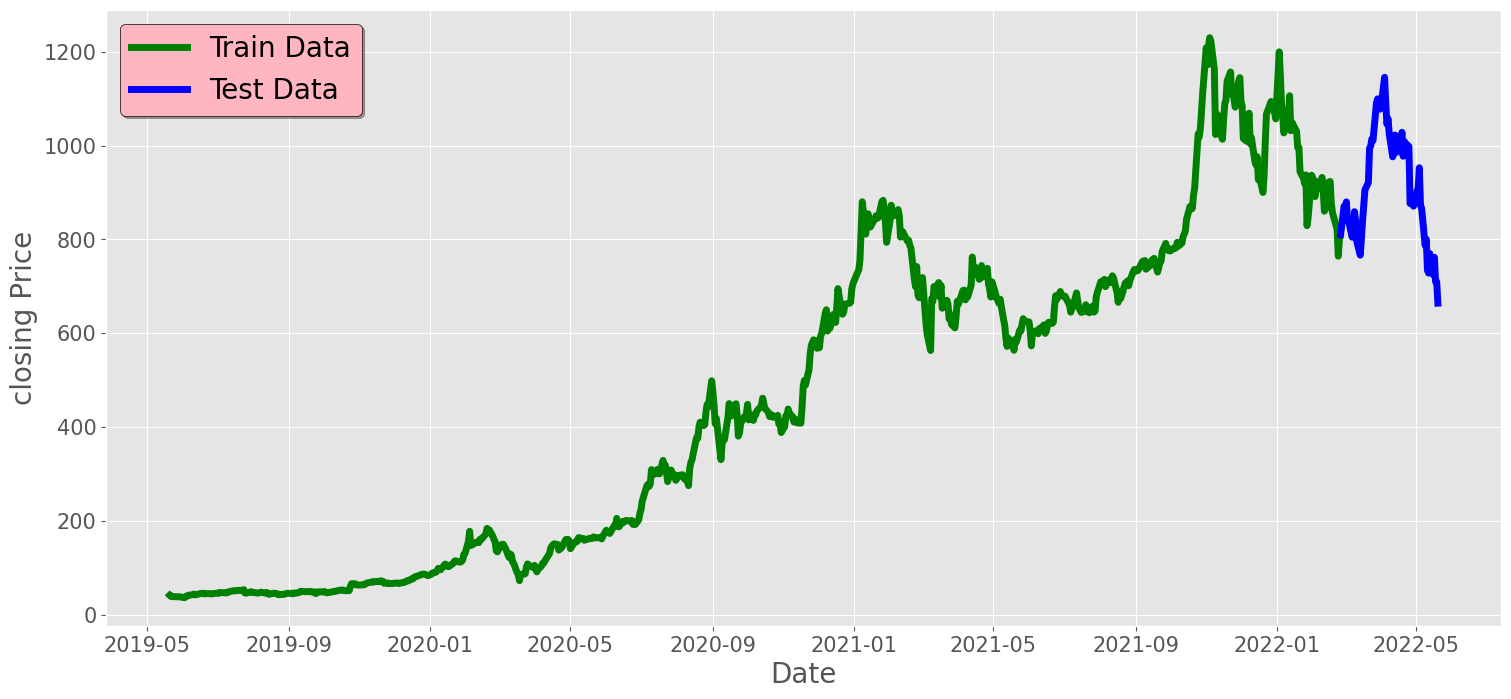

In [31]:
# split data into train and test
train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Date',fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("closing Price", fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(train_data,'green',label ='Train Data',linewidth=5)
plt.plot(test_data,'blue',label = 'Test Data',linewidth = 5)
plt.legend(fontsize = 20,shadow = True,facecolor ='lightpink',edgecolor ='k')

# Model Building

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [33]:
history = [x for x in train_data]
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [34]:
model = ARIMA(history, order =(1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 26 Mar 2024   AIC                           6306.700
Time:                        19:22:43   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model.forecast()

array([800.2043833])

In [36]:
mean_squared_error([test_data[0]],model.forecast())
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.665611820315121

In [37]:

def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [38]:
# evaluate different combinations of p,d and q for the arima model to get best order for model

def evaluate_models(dataset,test_data,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test_data,order)
                    if rmse<best_score:
                        best_score,best_cfg = rmse,order
                    print('ARIMA%s RMSE=%.3f'%(order,rmse))
                except:
                    continue
    print('BEST ARIMA%s RMSE=%.3f'%(best_cfg,best_score))

In [39]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [40]:
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=160.054
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.779
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.738
ARIMA(2, 2, 2) RMSE=39.732
BEST ARIMA(2, 0, 0) RMSE=39.440


In [41]:

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order = (2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE OF ARIMA MODEL : ',np.sqrt(mean_squared_error(test_data,predictions)))

RMSE OF ARIMA MODEL :  39.43992458871628


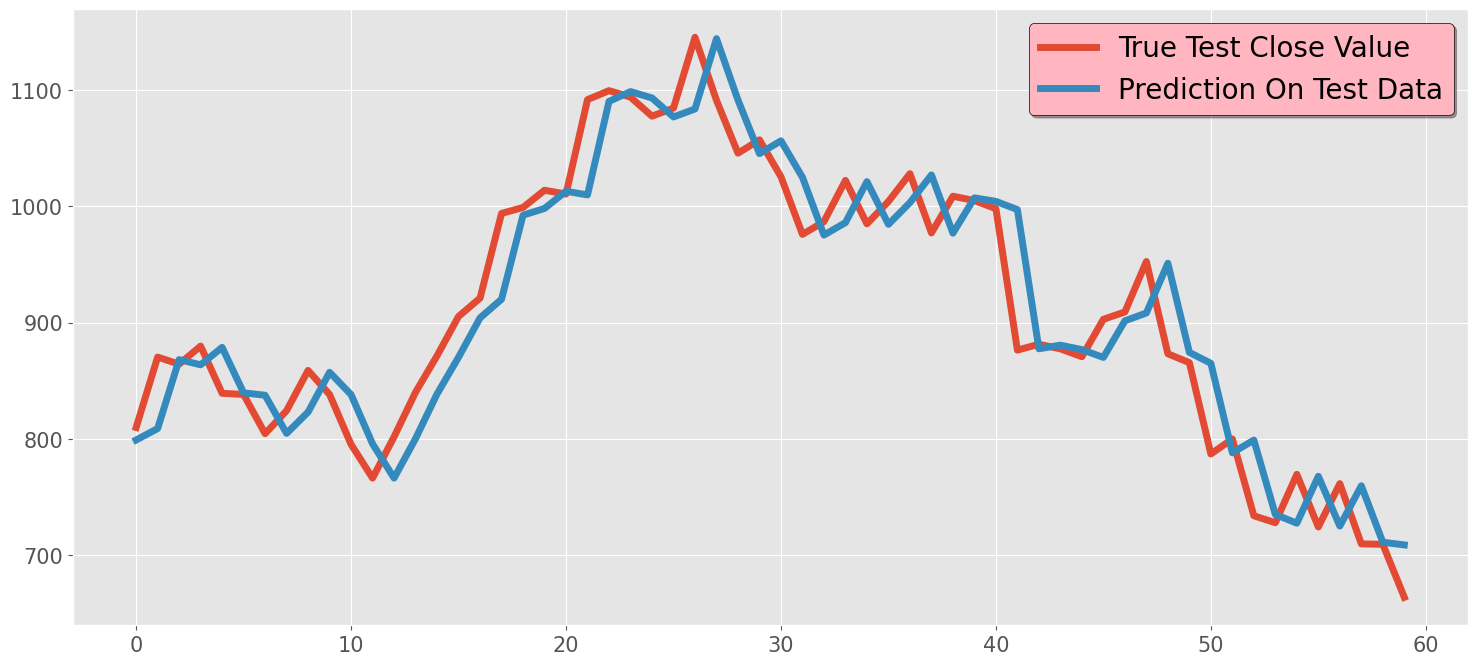

In [42]:
plt.figure(figsize = (18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label = 'True Test Close Value',linewidth = 5)
plt.plot(range(len(predictions)),predictions,label = 'Prediction On Test Data',linewidth = 5)
plt.xticks(fontsize =15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20,shadow = True,facecolor='lightpink',edgecolor = 'k')
plt.show()


In [43]:
fc_series = pd.Series(predictions,index = test_data.index)


Text(0.5, 1.0, 'Forcast and Actual')

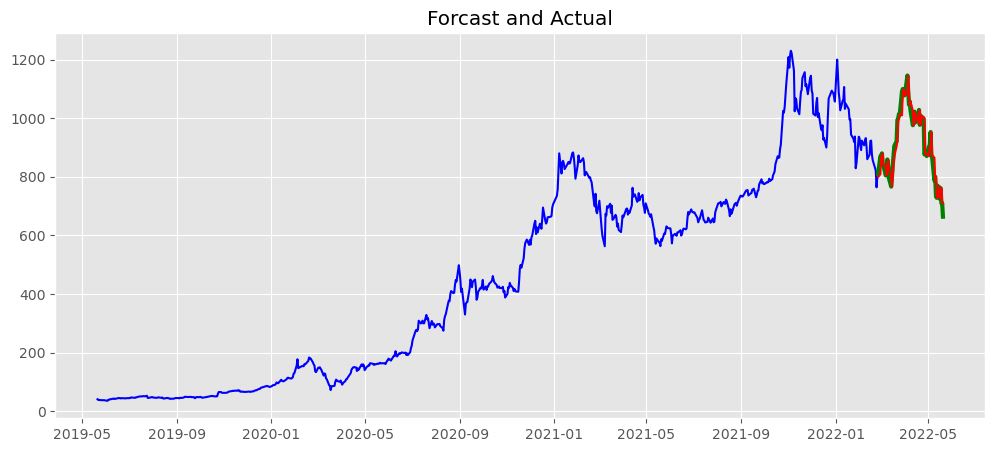

In [44]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

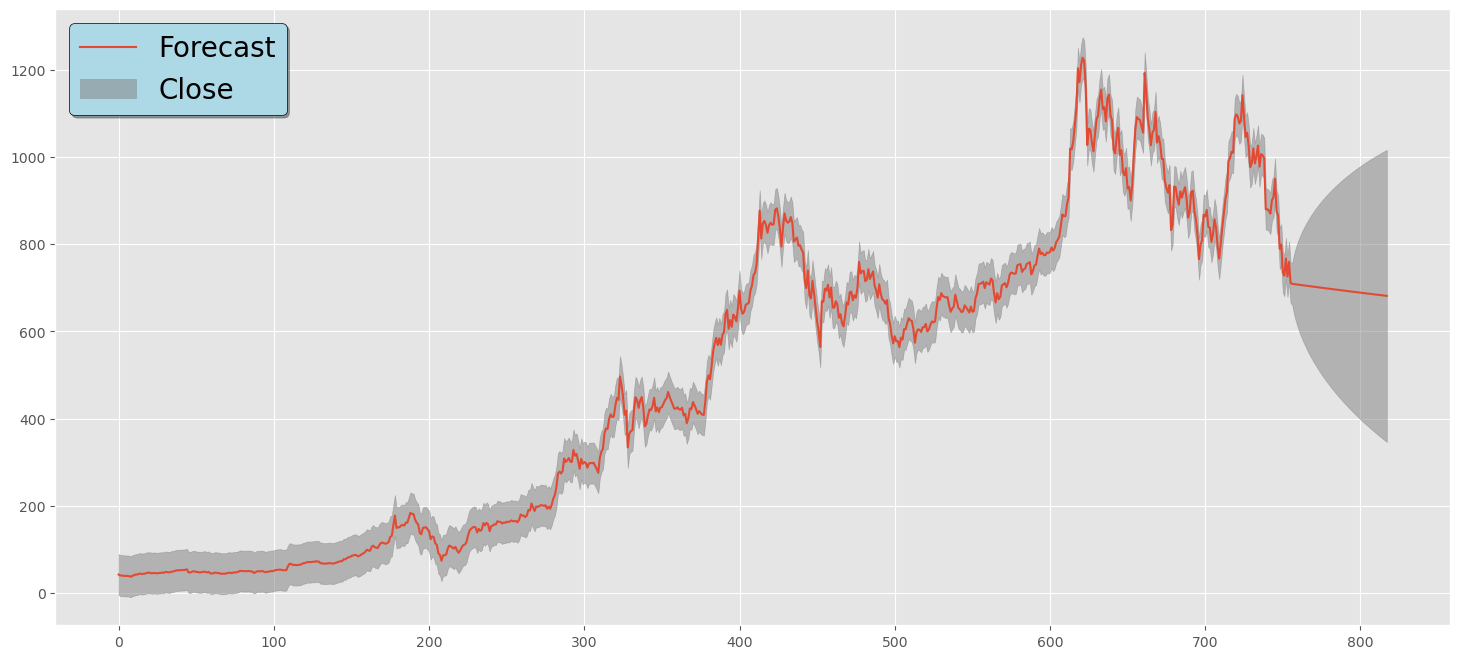

In [45]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [46]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.7394818628715


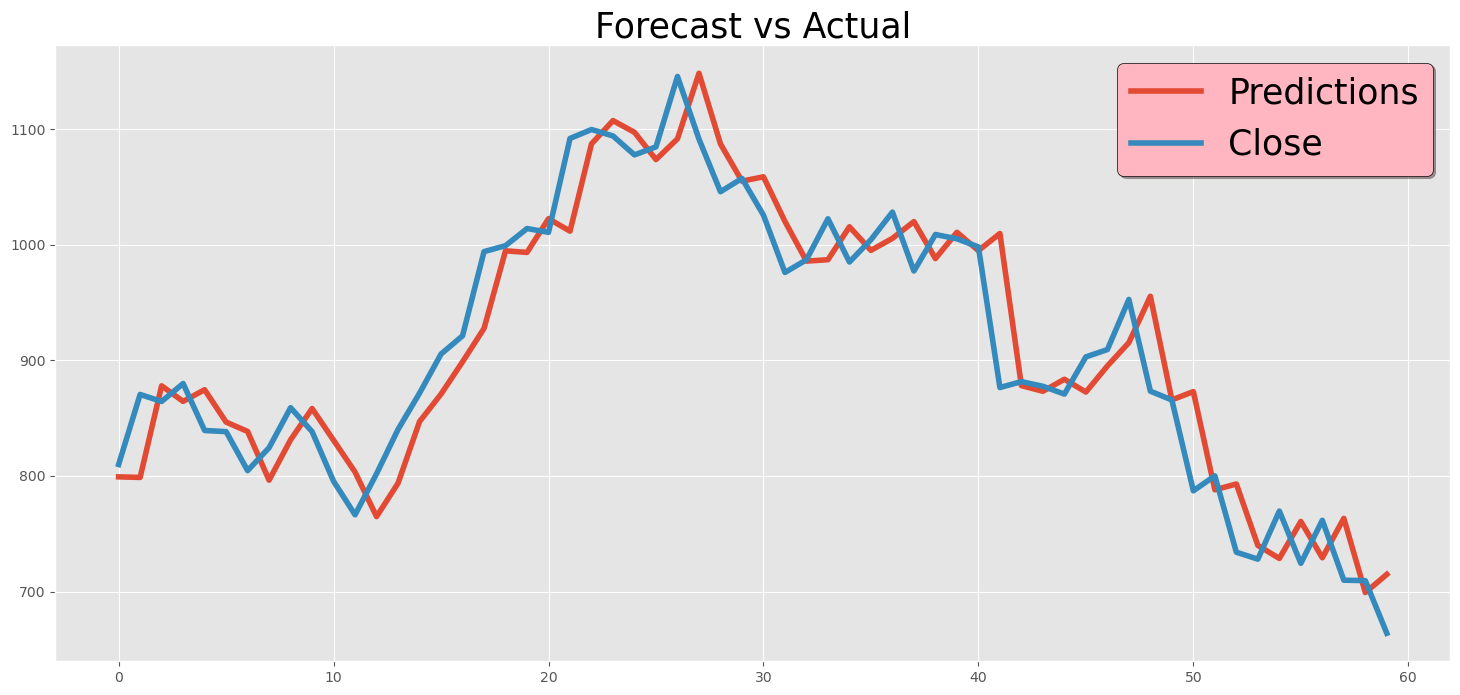

In [47]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')